![bse_logo_textminingcourse](https://bse.eu/sites/default/files/bse_logo_small.png)

# Text Mining: Models and Algorithms

## Problem Set 1

### Import Functions


In [82]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [83]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os
import seaborn as sns
import statsmodels.api as sm

# ML Functions
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error

# NLP functions
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob


import spacy
sp = spacy.load('en_core_web_sm')

import re
from nltk.corpus import stopwords

import warnings
# Ignore SettingWithCopyWarning
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")

### Create DataFrames

In [84]:
barcelona_p1 = pd.DataFrame(pd.read_csv('./Barcelona_Data_06-08.csv'))
barcelona_p2 = pd.DataFrame(pd.read_csv('./Barcelona_Data_13-15_06.csv'))
control_p1 = pd.DataFrame(pd.read_csv('./Madrid_Data_06-08.csv'))
control_p2 = pd.DataFrame(pd.read_csv('./Madrid_Data_13-15_06.csv'))

### Dummy variables

In [85]:
barcelona_p1['Treatment_period'] = 0
barcelona_p2['Treatment_period'] = 1
control_p1['Treatment_period'] = 0
control_p2['Treatment_period'] = 1

barcelona_p1['Treatment_city'] = 1
barcelona_p2['Treatment_city'] = 1
control_p1['Treatment_city'] = 0
control_p2['Treatment_city'] = 0

### Concatenate the Dataframes

In [86]:
df = pd.concat([barcelona_p1, barcelona_p2, control_p1, control_p2])

### Exploratory Data Analysis

In [87]:
# Create a new column for combined treatment condition
df['Treatment_condition'] = df['Treatment_period'] * 2 + df['Treatment_city']
df['Price'] = pd.to_numeric(df['Price'].str.replace('€', '').str.replace('.', ''), errors='coerce')
mapping = {0: 'Control_city_p1', 1: 'Treatment_city_p1', 2:'Control_city_p2', 3:'Treatment_city_p2'}
df['Treatment_city_and_treatment'] = df['Treatment_condition'].map(mapping)
df = df.drop('Treatment_condition', axis = 1)

In [88]:
df

,Unnamed: 0,Hotels,Ratings,Price,Link,Descriptions,Treatment_period,Treatment_city,Treatment_city_and_treatment
0,0,Mayerling Bisbe Urquinaona,"8,0",443,https://www.booking.com/hotel/es/chic-basic-ur...,El Mayerling Bisbe Urquinaona ofrece WiFi grat...,0,1,Treatment_city_p1
1,1,Hotel Arts Barcelona,"8,4",1189,https://www.booking.com/hotel/es/arts-barcelon...,Este hotel de diseño tiene vistas a la playa d...,0,1,Treatment_city_p1
2,2,Pensión Coral,"7,8",194,https://www.booking.com/hotel/es/pensia3n-cora...,Esta pensión se encuentra detrás de la plaza d...,0,1,Treatment_city_p1
3,3,Hotel Peninsular,"7,0",270,https://www.booking.com/hotel/es/peninsular-ba...,Este hotel encantador está situado a pocos min...,0,1,Treatment_city_p1
4,4,H Regas Adults Only,"7,5",305,https://www.booking.com/hotel/es/hregas.es.htm...,H Regas Adults Only ofrece habitaciones con ai...,0,1,Treatment_city_p1
...,...,...,...,...,...,...,...,...,...
820,820,Room Plaza España,"8,7",260,https://www.booking.com/hotel/es/room-plaza-es...,"Room Plaza España está en el centro de Madrid,...",1,0,Control_city_p2
821,821,Hostal La Casa de La Plaza,"7,2",247,https://www.booking.com/hotel/es/hostal-la-cas...,Este establecimiento ofrece una buena relación...,1,0,Control_city_p2
822,822,Hostal Regio,"8,0",246,https://www.booking.com/hotel/es/hostal-regio....,El Hostal Regio se encuentra en una calle tran...,1,0,Control_city_p2
823,823,Far Home Atocha,"8,5",240,https://www.booking.com/hotel/es/no-name-city-...,El Far Home Atocha está situado en el centro d...,1,0,Control_city_p2


### Plotting Prices with the different Treatment conditions

- Treated city in treatment Period
- Control city in Treatment period
- Treated city in Control Period
- Control city in Control Period

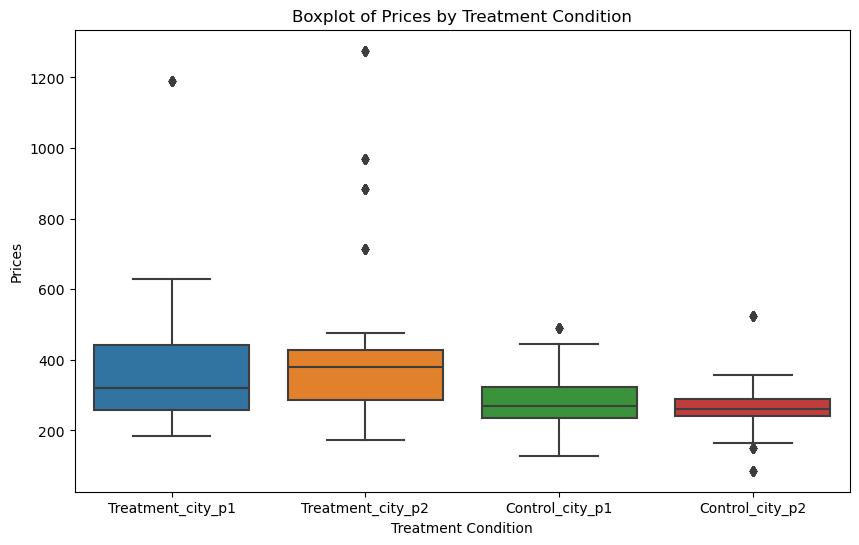

In [89]:
# Create a boxplot with conditional grouping
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x ='Treatment_city_and_treatment', y = 'Price')

# Add labels and title
plt.xlabel('Treatment Condition')
plt.ylabel('Prices')
plt.title('Boxplot of Prices by Treatment Condition')

# Show the plot
plt.show()

The plot shows that there is a difference in the distribution of data as the observed prices for the treatment city have a greater standard deviation compared to the values in the control city. It also highlights a difference in the average price in the treatment city in the two different periods which is not matched in the control city, showing that there might be a positive effect of treatment on the prices.

### Average Prices

In [90]:
average_prices = df.groupby('Treatment_city_and_treatment')['Price'].mean()
average_prices

Treatment_city_and_treatment
Control_city_p1      284.920000
Control_city_p2      262.280000
Treatment_city_p1    374.038462
Treatment_city_p2    437.423077
Name: Price, dtype: float64

### Regressions

#### Regression based on city

In [91]:
# Regression with only "treatment period" dummy
X1 = sm.add_constant(df['Treatment_city'])
model1 = sm.OLS(df['Price'], X1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     527.9
Date:                Tue, 23 Jan 2024   Prob (F-statistic):          2.10e-109
Time:                        12:52:31   Log-Likelihood:                -24620.
No. Observations:                3750   AIC:                         4.924e+04
Df Residuals:                    3748   BIC:                         4.926e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            274.5433      4.051     67.

#### Regression based on treatment period

In [103]:
# Regression with only "treatment period" dummy
X2 = sm.add_constant(df['Treatment_period'])
model2 = sm.OLS(df['Price'], X2)
results2 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     14.98
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           0.000110
Time:                        13:27:28   Log-Likelihood:                -24860.
No. Observations:                3750   AIC:                         4.972e+04
Df Residuals:                    3748   BIC:                         4.974e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              330.9166      4.081  

#### Regression Based on city and Treatment Period

In [44]:
# Regression with both "treatment period" and "treatment city" dummies and their interaction
df['Interaction_term'] = df['Treatment_period'] * df['Treatment_city']
X3 = sm.add_constant(df[['Treatment_period', 'Treatment_city', 'Interaction_term']])
model3 = sm.OLS(df['Price'], X3)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     204.5
Date:                Tue, 23 Jan 2024   Prob (F-statistic):          8.07e-123
Time:                        12:15:26   Log-Likelihood:                -24583.
No. Observations:                3750   AIC:                         4.917e+04
Df Residuals:                    3746   BIC:                         4.920e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              284.9200      5.451  

### Explanation

The coefficient 'Interaction Term' represents the difference-in-differences (DiD) estimate. 
It captures the differential effect of the treatment on prices by considering the interaction between "treatment period" and "treatment city." The DiD method helps control for time-invariant factors and isolates the impact of the treatment by comparing the changes in the treatment city to the changes in the control city over time.

The need for a second city (control city) is crucial in DiD analysis to create a counterfactual. The control city allows us to account for trends or factors affecting both the treatment and control groups similarly. The interaction term (Treatment_period × Treatment_city) captures the differential effect by considering how the treatment effect varies across the treatment and control groups.

Since the results show that there is a high, positive and significant coefficient this shows that there is a substantially positive effect of treatment on prices.

## NLP - Analyzing Descriptions

### Utils

In [93]:
def abbr_or_lower(word):
    if re.match('([A-Z]+[a-z]*){2,}', word):
        return word
    else:
        return word.lower()

In [78]:
df.shape

(3749, 11)

In [94]:
df = df.dropna()

### Preprocessing:
- Removing special characters and numbers.
- Converting words to lowercase.
- Removing stopwords.
- Applying stemming.

In [177]:
text_column = 'Descriptions'

# Remove special characters and numbers
# df['processed_text'] = df[text_column].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# OR (if you want to keep numbers)
df['processed_text'] = df[text_column].apply(lambda x: re.sub(r'\W', ' ', x))

# Convert each word using abbr_or_lower function
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join(abbr_or_lower(word) for word in x.split()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words("spanish")]))

# Apply stemming
stemmer = PorterStemmer()
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

print(df['processed_text'])

0       mayerl bisb urquinaona ofrec wifi gratuita pre...
1       hotel diseño vista playa barceloneta centro ba...
2       pensión encuentra detrá plaza sant jaum barrio...
3       hotel encantador situado poco minuto pie rambl...
4       h rega adult onli ofrec habitacion air acondic...
                              ...                        
3744    room plaza españa centro madrid 7 min pie gran...
3745    establecimiento ofrec buena relación calidad p...
3746    hostal regio encuentra call tranquila centro m...
3747    far home atocha situado centro madrid solo 5 m...
3748    hostal nersan encuentra 100 metro plaza españa...
Name: processed_text, Length: 3749, dtype: object


### Creating a document-term matrix (DTM)

In [181]:
# Create document term matrix using CountVectorizer

pd.set_option('display.max_columns', None)
vectorizer = CountVectorizer(ngram_range = (1,2), min_df=0.10, max_df=0.30)
X = vectorizer.fit_transform(df['processed_text'])

# Convert DTM to DataFrame
dtm_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
display(dtm_df)
dtm_df.shape

,10,10 minuto,15,15 minuto,200,200 metro,300,300 metro,500,500 metro,600,600 metro,acondicionado tv,acondicionado wifi,ademá,adolfo,adolfo suárez,aeropuerto adolfo,aeropuerto barcelona,aeropuerto cercano,alberga,alojamiento punto,alquil,alrededor,animado,aparcamiento,apartamento,artículo,artículo aseo,aseo,aseo gratuito,balcón,bar,baraja,barcelona prat,bare restaurant,batlló,bañera,bebida,bien,bornemisza,buffet,cada,cafetera,caja,caja fuert,calefacción,call,cama,casa,casa batlló,catalonia,cataluña,central,centro barcelona,centro madrid,cerca,cerca alojamiento,cercano,cercano aeropuerto,chueca,ciudad,coch,cocina,conexión wi,conexión wifi,consigna,consigna equipaj,cuenta recepción,cuentan,decoración,desayuno,desayuno buffet,dispon,disponen air,disponen baño,distancia,ducha,edificio,elegant,encuentra barcelona,encuentra minuto,equipada,equipaj,escritorio,españa,estacion,estacion metro,estación tren,familia,famosa,fi,fi gratuita,fuert,gaudí,grati,gratuita habitacion,gratuita toda,gratuito,habitacion air,habitacion disponen,habitacion hotel,halla,hostal,incluy,información,información turística,inmediacion,instalacion,internet,interé,junto,km alojamiento,libr,lugar,lugar interé,madrid baraja,mayor,mayor madrid,meno,mercado,metro estación,metro gran,metro plaza,metro puerta,microonda,min,min pie,minibar,moderna,moderno,museo,museo prado,museo thyssen,nevera,numeroso,ofrec alojamiento,ofrec habitacion,ofrec servicio,ofrecen,palacio,palacio real,parada,parqu,paseo,pedrera,person,pie estación,pie plaza,piscina,plaza cataluña,plaza españa,plaza mayor,prado,prat,presentan,presentan decoración,privado ducha,puerta,puerta sol,punto,punto interé,queda,rambla,real,recepción 24,ropa,ropa cama,sagrada,sagrada familia,salón,san,sant,satélit,servicio alquil,sirv,sirv desayuno,sol,solo,suelo,suárez,suárez madrid,terraza,thyssen,thyssen bornemisza,tienda,toalla,toda habitacion,tren,turística,tv vía,ubicado,vario,vista,vía satélit,wi,wi fi,wifi grati
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
3,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,2,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,

(3749, 198)

### Percentage of presence of chosen word

In [182]:
chosen_word = 'plaza españa'
print(f"Percentage of presence of the chose word: {round((dtm_df[chosen_word].sum()/dtm_df.shape[0]),3)*100}%")

Percentage of presence of the chose word: 24.9%


### Creating Term Frequency (TF)-Inverse Document Frequency (IDF) and text_length features 

In [183]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.1, max_df=0.30)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# Convert TF-IDF to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Reset index of the original DataFrame to avoid duplicate indices
df = df.reset_index(drop=True)

# Add length feature
tfidf_df['text_length'] = df['processed_text'].apply(len)

# Concatenate the TF-IDF features and length with your original DataFrame
final_df = pd.concat([df, tfidf_df], axis=1)

# Display the final DataFrame
display(final_df)


,Unnamed: 0,Hotels,Ratings,Price,Link,Descriptions,Treatment_period,Treatment_city,Treatment_city_and_treatment,processed_text,sentiment,Interaction_term,contains_aeropuerto,contains_hotel,contains_habitaciones,10,10 minuto,15,15 minuto,200,200 metro,300,300 metro,500,500 metro,600,600 metro,acondicionado tv,acondicionado wifi,ademá,adolfo,adolfo suárez,aeropuerto adolfo,aeropuerto barcelona,aeropuerto cercano,alberga,alojamiento punto,alquil,alrededor,animado,aparcamiento,apartamento,artículo,artículo aseo,aseo,aseo gratuito,balcón,bar,baraja,barcelona prat,bare restaurant,batlló,bañera,bebida,bien,bornemisza,buffet,cada,cafetera,caja,caja fuert,calefacción,call,cama,casa,casa batlló,catalonia,cataluña,central,centro barcelona,centro madrid,cerca,cerca alojamiento,cercano,cercano aeropuerto,chueca,ciudad,coch,cocina,conexión wi,conexión wifi,consigna,consigna equipaj,cuenta recepción,cuentan,decoración,desayuno,desayuno buffet,dispon,disponen air,disponen baño,distancia,ducha,edificio,elegant,encuentra barcelona,encuentra minuto,equipada,equipaj,escritorio,españa,estacion,estacion metro,estación tren,familia,famosa,fi,fi gratuita,fuert,gaudí,grati,gratuita habitacion,gratuita toda,gratuito,habitacion air,habitacion disponen,habitacion hotel,halla,hostal,incluy,información,información turística,inmediacion,instalacion,internet,interé,junto,km alojamiento,libr,lugar,lugar interé,madrid baraja,mayor,mayor madrid,meno,mercado,metro estación,metro gran,metro plaza,metro puerta,microonda,min,min pie,minibar,moderna,moderno,museo,museo prado,museo thyssen,nevera,numeroso,ofrec alojamiento,ofrec habitacion,ofrec servicio,ofrecen,palacio,palacio real,parada,parqu,paseo,pedrera,person,pie estación,pie plaza,piscina,plaza cataluña,plaza españa,plaza mayor,prado,prat,presentan,presentan decoración,privado ducha,puerta,puerta sol,punto,punto interé,queda,rambla,real,recepción 24,ropa,ropa cama,sagrada,sagrada familia,salón,san,sant,satélit,servicio alquil,sirv,sirv desayuno,sol,solo,suelo,suárez,suárez madrid,terraza,thyssen,thyssen bornemisza,tienda,toalla,toda habitacion,tren,turística,tv vía,ubicado,vario,vista,vía satélit,wi,wi fi,wifi grati,text_length
0,0,Mayerling Bisbe Urquinaona,"8,0",443,https://www.booking.com/hotel/es/chic-basic-ur...,El Mayerling Bisbe Urquinaona ofrece WiFi grat...,0,1,Treatment_city_p1,mayerl bisb urquinaona ofrec wifi gratuita pre...,0.0,0,1,0,0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.187291,0.187291,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.192298,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.189861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.211494,0.000000,0.000000,0.173487,0.000000,0.000000,0.000000,0.000000,0.0,0.412081,0.000000,0.201815,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.149790,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149665,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.213579,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.200064,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212608,0.000000,0.000000,0.000000,0.214070,0.000000,0.412081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.206919,0.179055,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324435,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,450
1,1,Hot

### Show top words

In [184]:
from nltk.corpus import stopwords

# Assuming 'Descriptions' is the column containing text descriptions
corpus = df['Descriptions']

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords.words("spanish"))
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

# Get feature names and TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = X_tfidf.toarray()

# Create a DataFrame to display the top words and their TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_scores, columns=feature_names)

# Display the top words and their TF-IDF scores
top_words = tfidf_df.sum(axis=0).sort_values(ascending=False)
print(top_words)

madrid          268.593036
minutos         245.413763
hotel           242.641566
habitaciones    221.347340
pie             217.244877
                   ...    
fabulosos         4.367491
debido            4.367491
teléfonos         4.367491
facilitar         4.367491
gayxample         4.367491
Length: 1000, dtype: float64


### Sentiment Analysis

In [185]:
# Assuming 'Descriptions' is the column containing text descriptions
final_df['sentiment'] = final_df['Descriptions'].apply(lambda x: TextBlob(x).sentiment.polarity)
final_df

,Unnamed: 0,Hotels,Ratings,Price,Link,Descriptions,Treatment_period,Treatment_city,Treatment_city_and_treatment,processed_text,sentiment,Interaction_term,contains_aeropuerto,contains_hotel,contains_habitaciones,10,10 minuto,15,15 minuto,200,200 metro,300,300 metro,500,500 metro,600,600 metro,acondicionado tv,acondicionado wifi,ademá,adolfo,adolfo suárez,aeropuerto adolfo,aeropuerto barcelona,aeropuerto cercano,alberga,alojamiento punto,alquil,alrededor,animado,aparcamiento,apartamento,artículo,artículo aseo,aseo,aseo gratuito,balcón,bar,baraja,barcelona prat,bare restaurant,batlló,bañera,bebida,bien,bornemisza,buffet,cada,cafetera,caja,caja fuert,calefacción,call,cama,casa,casa batlló,catalonia,cataluña,central,centro barcelona,centro madrid,cerca,cerca alojamiento,cercano,cercano aeropuerto,chueca,ciudad,coch,cocina,conexión wi,conexión wifi,consigna,consigna equipaj,cuenta recepción,cuentan,decoración,desayuno,desayuno buffet,dispon,disponen air,disponen baño,distancia,ducha,edificio,elegant,encuentra barcelona,encuentra minuto,equipada,equipaj,escritorio,españa,estacion,estacion metro,estación tren,familia,famosa,fi,fi gratuita,fuert,gaudí,grati,gratuita habitacion,gratuita toda,gratuito,habitacion air,habitacion disponen,habitacion hotel,halla,hostal,incluy,información,información turística,inmediacion,instalacion,internet,interé,junto,km alojamiento,libr,lugar,lugar interé,madrid baraja,mayor,mayor madrid,meno,mercado,metro estación,metro gran,metro plaza,metro puerta,microonda,min,min pie,minibar,moderna,moderno,museo,museo prado,museo thyssen,nevera,numeroso,ofrec alojamiento,ofrec habitacion,ofrec servicio,ofrecen,palacio,palacio real,parada,parqu,paseo,pedrera,person,pie estación,pie plaza,piscina,plaza cataluña,plaza españa,plaza mayor,prado,prat,presentan,presentan decoración,privado ducha,puerta,puerta sol,punto,punto interé,queda,rambla,real,recepción 24,ropa,ropa cama,sagrada,sagrada familia,salón,san,sant,satélit,servicio alquil,sirv,sirv desayuno,sol,solo,suelo,suárez,suárez madrid,terraza,thyssen,thyssen bornemisza,tienda,toalla,toda habitacion,tren,turística,tv vía,ubicado,vario,vista,vía satélit,wi,wi fi,wifi grati,text_length
0,0,Mayerling Bisbe Urquinaona,"8,0",443,https://www.booking.com/hotel/es/chic-basic-ur...,El Mayerling Bisbe Urquinaona ofrece WiFi grat...,0,1,Treatment_city_p1,mayerl bisb urquinaona ofrec wifi gratuita pre...,0.0,0,1,0,0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.187291,0.187291,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.192298,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.189861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.211494,0.000000,0.000000,0.173487,0.000000,0.000000,0.000000,0.000000,0.0,0.412081,0.000000,0.201815,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.149790,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149665,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.213579,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.200064,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212608,0.000000,0.000000,0.000000,0.214070,0.000000,0.412081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.206919,0.179055,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324435,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,450
1,1,Hot

### Ideas for NLP:
- Including Keyword presence (words related to Sonar Festival)
- Word Embeddings (Optional)


## Final Regression

### Adding NLP Features

In [186]:
# Regression with both "treatment period" and "treatment city" dummies and their interaction
final_df['Interaction_term'] = final_df['Treatment_period'] * final_df['Treatment_city']
X4 = sm.add_constant(final_df[['Treatment_period', 'Treatment_city', 'Interaction_term', 'plaza españa']])
model4 = sm.OLS(final_df['Price'], X4)
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     155.1
Date:                Tue, 23 Jan 2024   Prob (F-statistic):          6.28e-123
Time:                        14:52:37   Log-Likelihood:                -24574.
No. Observations:                3749   AIC:                         4.916e+04
Df Residuals:                    3744   BIC:                         4.919e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              289.5552      5.786  